In [1]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from collections import Counter, defaultdict

%matplotlib inline

In [2]:
with open('../input/zdelta/weight_zscore_rf_delta_data.pickle', 'rb') as fh:
    x, y, tf_list = pickle.load(fh)

In [3]:
df = pd.DataFrame(np.sum(x, axis=1, dtype=np.int32), columns=['delta feature sum'])
df['delta zpsi'] = y['PSI']

In [4]:
df1 = df[df['delta feature sum'] < 30]
df2 = df1[df1['delta zpsi'] > 2]
sd2_count = df2.groupby('delta feature sum').count().reset_index()
sd2_count = sd2_count.rename(columns = {'delta zpsi':'counts of delta zpsi > 2'})

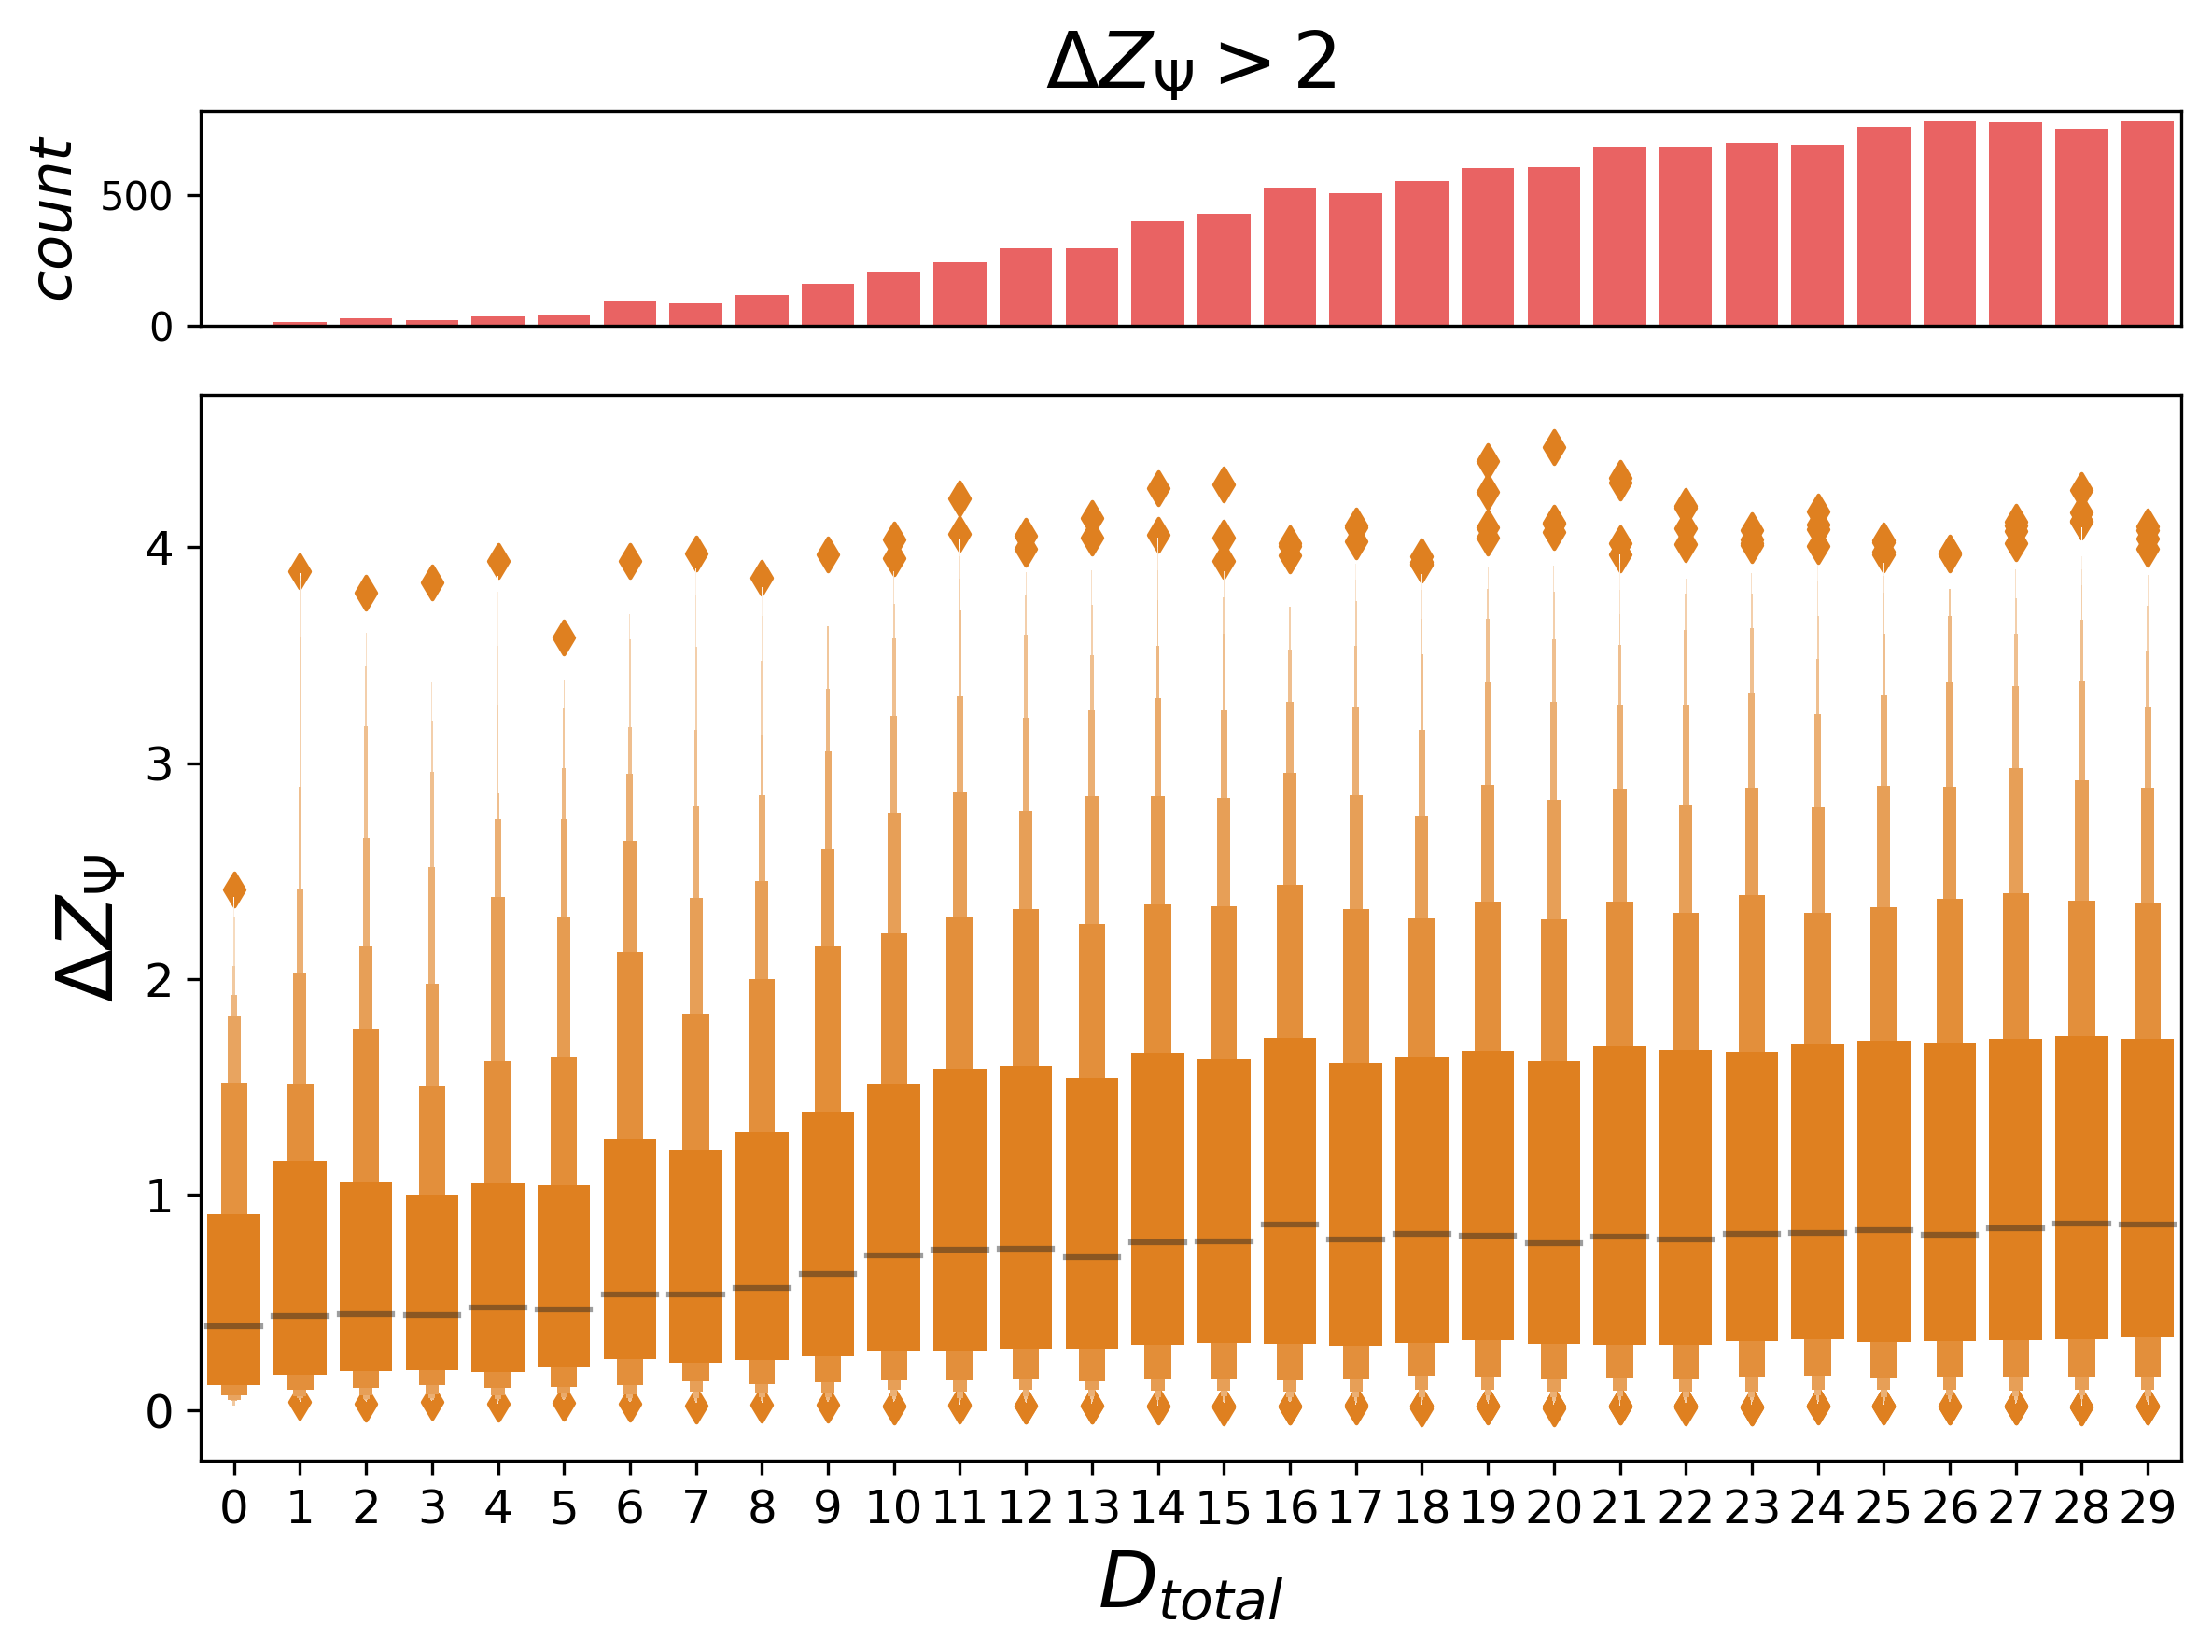

In [5]:
# feature as x and psi as y
fig = plt.figure(figsize=(8.0, 6.0), dpi=300)
# gridspec.GridSpec(8,1)
# plt.subplot2grid((3,1), (1,0), rowspan=7)
# fig, ax = plt.subplots(2, 1, figsize=(12.0, 12.0), sharex='col')
plt.subplot(5, 1, (2,5))
ax = sns.boxenplot(x="delta feature sum", y="delta zpsi", data=df1, color='#FF8000')
ax.set_xlabel(r'$D_{total}$', fontsize=20)
ax.set_ylabel(r'$\Delta Z_{\Psi}$', fontsize=20)
ax.tick_params(labelsize=12)
# plt.subplot2grid((3,1), (0,0))
plt.subplot(5, 1, 1)
ax = sns.barplot(x="delta feature sum", y="counts of delta zpsi > 2", data=sd2_count, color='#FF4D4D')
ax.set_ylabel(r'$count$', fontsize=15)
ax.axes.get_xaxis().set_visible(False)
ax.set_title(r'$\Delta Z_{\Psi} > 2$', fontsize=20)
fig.tight_layout()
plt.show()
# plt.savefig('results/box_plot.png', dpi=300)

In [6]:
fig = plt.figure(figsize=(12.0, 2.0), dpi=300)
# sns.barplot(x="delta feature sum", y="delta psi", data=sd2_count)
sns.barplot(x="delta feature sum", y="delta psi", data=sd2_count)
fig.tight_layout()
plt.show()

ValueError: Could not interpret input 'delta psi'

<Figure size 3600x600 with 0 Axes>

In [ ]:
# psi as x and feature as y
labels = ["{0} - {1}".format(i/10000, (i + 499)/10000) for i in range(0, 10000, 500)]
df['group'] = pd.cut(df['delta psi']*10000, range(0, 10500, 500), right=False, labels=labels)

fig = plt.figure(figsize=(16.0, 4.0))
sns.boxplot(x="group", y="delta feature sum", data=df)
fig.tight_layout()
# plt.savefig('results/box_plot.png', dpi=300)